In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("/kaggle/input/electric-vehicle-population-size-2024/Electric_Vehicle_Population_Size_History_By_County_.csv")
data.sample(10)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
20626,December 31 2023,Douglas,NE,Passenger,0,1,1,23,24,4.17
16626,July 31 2022,Travis,TX,Passenger,2,0,2,112,114,1.75
13389,May 31 2023,Stevens,WA,Truck,1,0,1,"18,760","18,761",0.01
17222,June 30 2019,Maricopa,AZ,Passenger,6,5,11,"1,598","1,609",0.68
15775,November 30 2023,Prince William,VA,Passenger,1,2,3,146,149,2.01
15776,May 31 2020,Osceola,FL,Passenger,1,0,1,40,41,2.44
15380,July 31 2020,Klickitat,WA,Truck,0,0,0,"8,115","8,115",0.00
513,October 31 2020,Clark,WA,Truck,0,0,0,"83,142","83,142",0.00
13254,November 30 2023,Cumberland,PA,Passenger,1,1,2,35,37,5.41
1919,October 31 2018,Collier,FL,Passenger,1,0,1,20,21,4.76


****

In [2]:
#Data observation
info=data.info()
shape=data.shape
missing_values = data.isnull().sum()
has_duplicates = data.duplicated().any()  
print(info)
print(shape)
print(missing_values)
print("Are there duplicate columns?：", has_duplicates)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [3]:
#Deleting rows with missing values
columns_to_clean = ['County', 'State']  
data_cleaned = data.dropna(subset=columns_to_clean)

#Data type conversion
data_cleaned['Battery Electric Vehicles (BEVs)'] = data_cleaned['Battery Electric Vehicles (BEVs)'].str.replace(',', '').astype(int)
data_cleaned['Plug-In Hybrid Electric Vehicles (PHEVs)'] = data_cleaned['Plug-In Hybrid Electric Vehicles (PHEVs)'].str.replace(',', '').astype(int)
data_cleaned['Electric Vehicle (EV) Total'] = data_cleaned['Electric Vehicle (EV) Total'].str.replace(',', '').astype(int)
data_cleaned['Non-Electric Vehicle Total'] = data_cleaned['Non-Electric Vehicle Total'].str.replace(',', '').astype(int)
data_cleaned['Total Vehicles'] = data_cleaned['Total Vehicles'].str.replace(',', '').astype(int)
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

info=data_cleaned.info()
shape=data_cleaned.shape
missing_values = data_cleaned.isnull().sum()
print(info)
print(shape)
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
Index: 20733 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20733 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20733 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20733 non-null  int64         
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20733 non-null  int64         
 6   Electric Vehicle (EV) Total               20733 non-null  int64         
 7   Non-Electric Vehicle Total                20733 non-null  int64         
 8   Total Vehicles                            20733 non-null  int64         
 9   Percent Electric Vehicles        

/tmp/ipykernel_17/2393735433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Battery Electric Vehicles (BEVs)'] = data_cleaned['Battery Electric Vehicles (BEVs)'].str.replace(',', '').astype(int)
/tmp/ipykernel_17/2393735433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Plug-In Hybrid Electric Vehicles (PHEVs)'] = data_cleaned['Plug-In Hybrid Electric Vehicles (PHEVs)'].str.replace(',', '').astype(int)
/tmp/ipykernel_17/2393735433.py:8: SettingWithCopyWarning: 
A value 

In [4]:
#Confirm that the 'State' column
State_number = data_cleaned['State'].nunique()

#Confirm that the 'Vehicle_Primary_Use' column has only 2 unique observation values
Vehicle_Primary_Use_number = data_cleaned['Vehicle Primary Use'].nunique()

#Confirm the sum of (BEVs) and (PHEVs) equals the (EV) Total.
data_cleaned['Sum_BEVs_PHEVs'] = data_cleaned['Battery Electric Vehicles (BEVs)'] + data_cleaned['Plug-In Hybrid Electric Vehicles (PHEVs)']
is_equal_2 = (data_cleaned['Sum_BEVs_PHEVs'] == data_cleaned['Electric Vehicle (EV) Total'])
rows_with_false_2 = data_cleaned[~is_equal_2]

#Confirm the sum of (EV) Total and Non-Electric Vehicle Total equals Total Vehicles.
data_cleaned['Sum_EV_NonEV'] = data_cleaned['Electric Vehicle (EV) Total'] + data_cleaned['Non-Electric Vehicle Total']
is_equal_1 = (data_cleaned['Sum_EV_NonEV'] == data_cleaned['Total Vehicles'])
rows_with_false_1 = data_cleaned[~is_equal_1]

print("The observations include the following states:", State_number)
print("Total count of state:", State_number)
print("Total count of vehicle primary use:", Vehicle_Primary_Use_number)
print("(EV)Total + (NEV)Total = (Total)Vehicles：", rows_with_false_1)
print("(BEVs) + (PHEVs) = (EV)Total：", rows_with_false_2)

The observations include the following states: 50
Total count of state: 50
Total count of vehicle primary use: 2
(EV)Total + (NEV)Total = (Total)Vehicles： Empty DataFrame
Columns: [Date, County, State, Vehicle Primary Use, Battery Electric Vehicles (BEVs), Plug-In Hybrid Electric Vehicles (PHEVs), Electric Vehicle (EV) Total, Non-Electric Vehicle Total, Total Vehicles, Percent Electric Vehicles, Sum_BEVs_PHEVs, Sum_EV_NonEV]
Index: []
(BEVs) + (PHEVs) = (EV)Total： Empty DataFrame
Columns: [Date, County, State, Vehicle Primary Use, Battery Electric Vehicles (BEVs), Plug-In Hybrid Electric Vehicles (PHEVs), Electric Vehicle (EV) Total, Non-Electric Vehicle Total, Total Vehicles, Percent Electric Vehicles, Sum_BEVs_PHEVs]
Index: []


/tmp/ipykernel_17/2593789858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Sum_BEVs_PHEVs'] = data_cleaned['Battery Electric Vehicles (BEVs)'] + data_cleaned['Plug-In Hybrid Electric Vehicles (PHEVs)']
/tmp/ipykernel_17/2593789858.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Sum_EV_NonEV'] = data_cleaned['Electric Vehicle (EV) Total'] + data_cleaned['Non-Electric Vehicle Total']


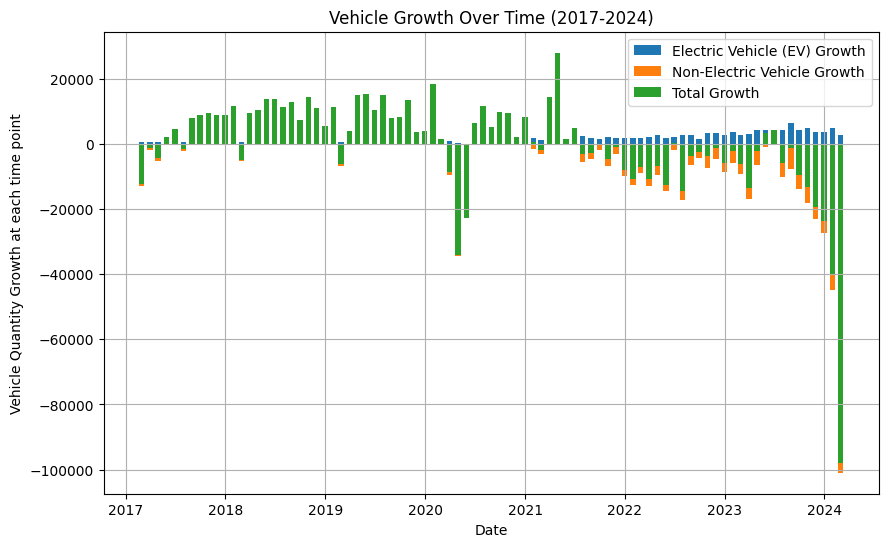

In [5]:
#Select data from 2017 to 2024
data_selected = data_cleaned[data_cleaned['Date'].dt.year.between(2017, 2024)]

#Merge duplicate dates and calculate the sum
merged_data = data_selected.groupby('Date').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum',
    'Total Vehicles': 'sum'
}).reset_index()

#Calculate the incremental change at each time point.
merged_data['EV Growth'] = merged_data['Electric Vehicle (EV) Total'].diff()
merged_data['Non-EV Growth'] = merged_data['Non-Electric Vehicle Total'].diff()
merged_data['Total Growth'] = merged_data['Total Vehicles'].diff()

#Bar chart
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Date'], merged_data['EV Growth'], width=20, label='Electric Vehicle (EV) Growth')
plt.bar(merged_data['Date'], merged_data['Non-EV Growth'], width=20, label='Non-Electric Vehicle Growth')
plt.bar(merged_data['Date'], merged_data['Total Growth'], width=20, label='Total Growth')
plt.xlabel('Date')
plt.ylabel('Vehicle Quantity Growth at each time point')
plt.title('Vehicle Growth Over Time (2017-2024)')
plt.legend()
plt.grid(True)
plt.show()

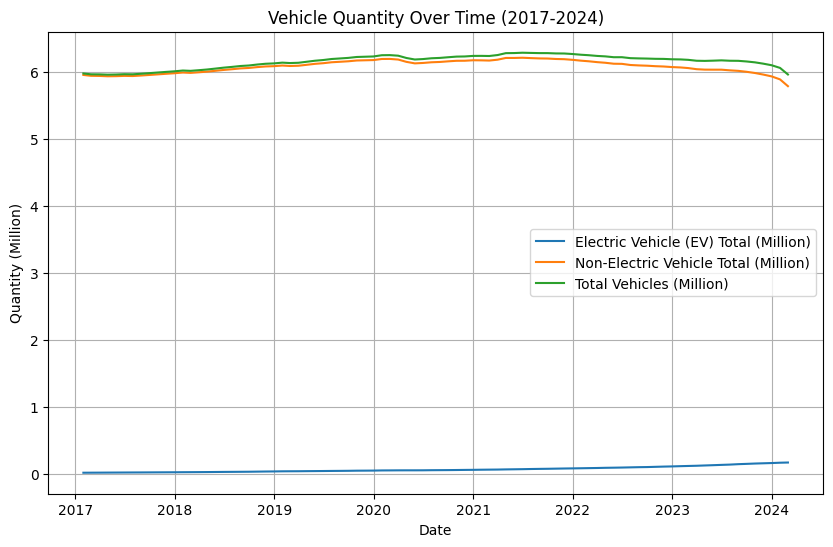

In [6]:
#Line chart
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Date'], merged_data['Electric Vehicle (EV) Total'] / 1000000, label='Electric Vehicle (EV) Total (Million)')
plt.plot(merged_data['Date'], merged_data['Non-Electric Vehicle Total'] / 1000000, label='Non-Electric Vehicle Total (Million)')
plt.plot(merged_data['Date'], merged_data['Total Vehicles'] / 1000000, label='Total Vehicles (Million)')
plt.xlabel('Date')
plt.ylabel('Quantity (Million)')
plt.title('Vehicle Quantity Over Time (2017-2024)')
plt.legend()
plt.grid(True)
plt.show()

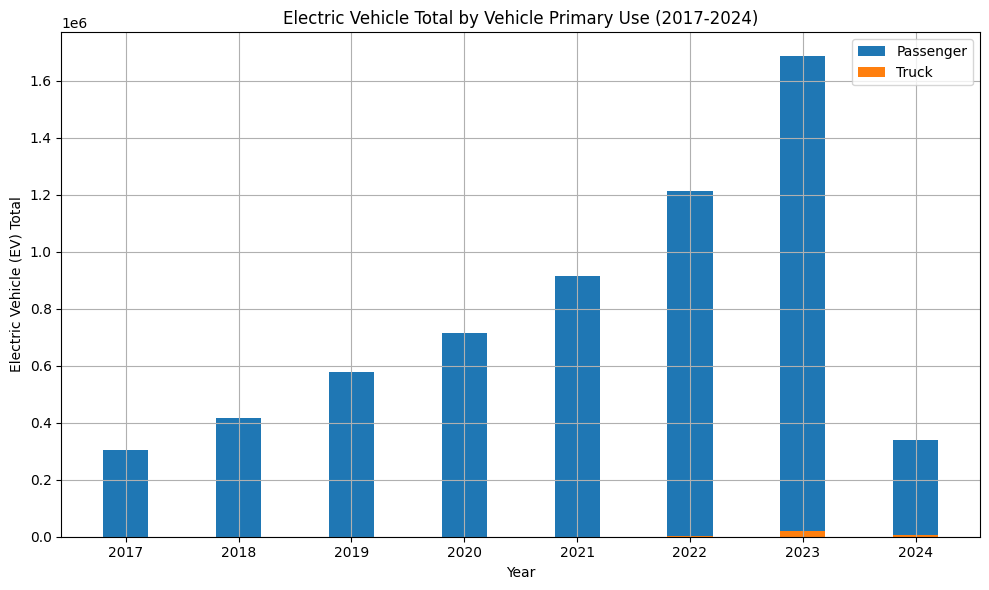

In [7]:
#Select data from 2017 to 2024
data_selected_years = data_cleaned[data_cleaned['Date'].dt.year.between(2017, 2024)]

#Group by year and Vehicle Primary Use, calculate the sum of Electric Vehicle (EV) Total
grouped_data = data_selected_years.groupby([data_selected_years['Date'].dt.year, 'Vehicle Primary Use']).agg({
    'Electric Vehicle (EV) Total': 'sum'
}).reset_index()

#Filter out Passenger and Truck data
passenger_data = grouped_data[grouped_data['Vehicle Primary Use'] == 'Passenger']
truck_data = grouped_data[grouped_data['Vehicle Primary Use'] == 'Truck']

#Bar chart
plt.figure(figsize=(10, 6))
plt.bar(passenger_data['Date'], passenger_data['Electric Vehicle (EV) Total'], width=0.4, label='Passenger', align='center')
plt.bar(truck_data['Date'], truck_data['Electric Vehicle (EV) Total'], width=0.4, label='Truck', align='center')
plt.xlabel('Year')
plt.ylabel('Electric Vehicle (EV) Total')
plt.title('Electric Vehicle Total by Vehicle Primary Use (2017-2024)')
plt.xticks(passenger_data['Date'])  # Set x-tick labels to the years
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

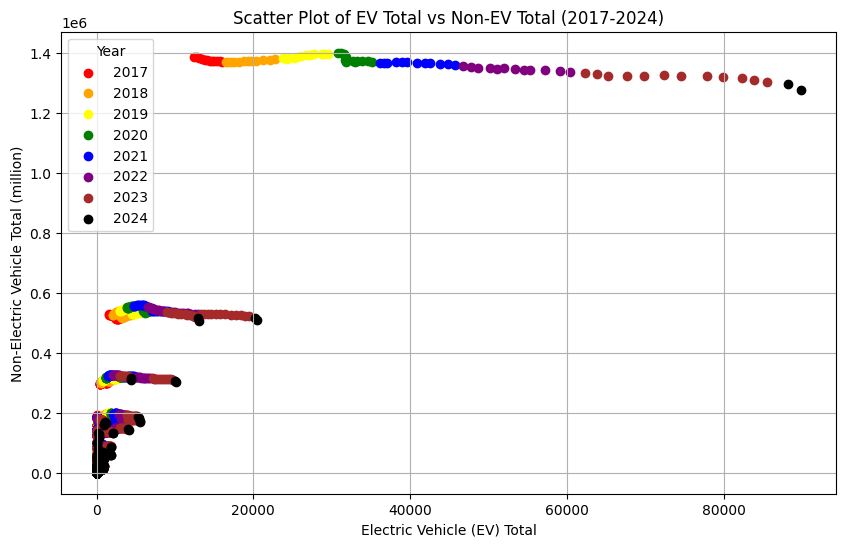

In [8]:
#Select data from 2017 to 2024
data_selected = data_cleaned[data_cleaned['Date'].dt.year.between(2017, 2024)]

#Sort the data by date
data_selected_years = data_selected.sort_values(by='Date')

#Define the years and corresponding colors
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black']

plt.figure(figsize=(10, 6))

#Scatter plot for each year
for i, year in enumerate(years):
    year_data = data_selected_years[data_selected_years['Date'].dt.year == year]
    plt.scatter(year_data['Electric Vehicle (EV) Total'], year_data['Non-Electric Vehicle Total'], color=colors[i], label=str(year))

plt.xlabel('Electric Vehicle (EV) Total')
plt.ylabel('Non-Electric Vehicle Total (million)')  # Add 'million' to y-axis label
plt.title('Scatter Plot of EV Total vs Non-EV Total (2017-2024)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

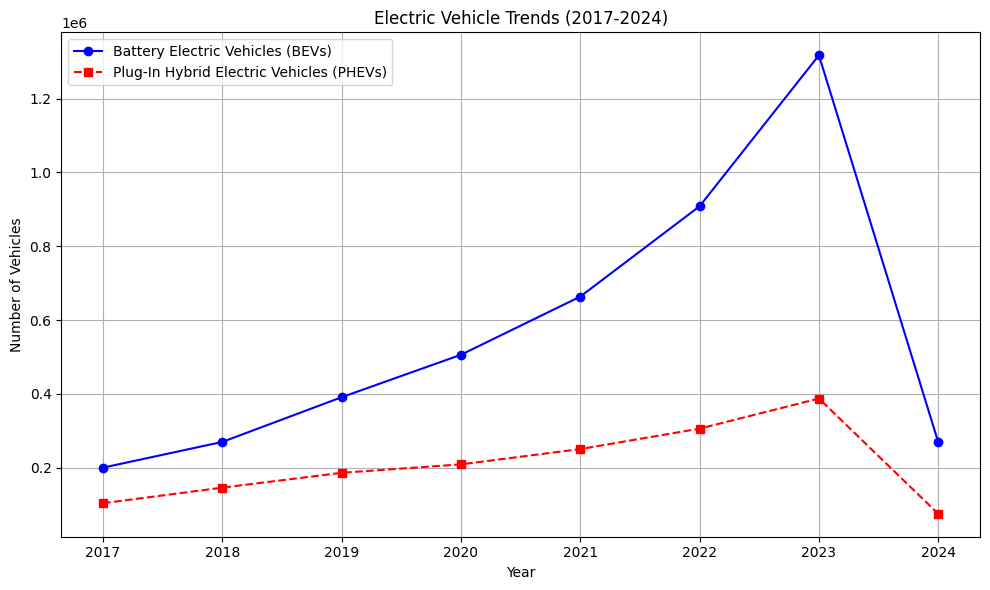

In [9]:
#Select data from 2017 to 2024
data_selected_years = data_cleaned[(data_cleaned['Date'].dt.year >= 2017) & (data_cleaned['Date'].dt.year <= 2024)]

#Sort the data by date
data_selected_years = data_selected_years.sort_values(by='Date')

#Extract the data representing the changes in Battery Electric Vehicles (BEVs) and Plug-In Hybrid Electric Vehicles (PHEVs)
bev_data = data_selected_years.groupby(data_selected_years['Date'].dt.year)['Battery Electric Vehicles (BEVs)'].sum().reset_index()
phev_data = data_selected_years.groupby(data_selected_years['Date'].dt.year)['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum().reset_index()

#Line chart
plt.figure(figsize=(10, 6))

plt.plot(bev_data['Date'], bev_data['Battery Electric Vehicles (BEVs)'], marker='o', linestyle='-', color='b', label='Battery Electric Vehicles (BEVs)')
plt.plot(phev_data['Date'], phev_data['Plug-In Hybrid Electric Vehicles (PHEVs)'], marker='s', linestyle='--', color='r', label='Plug-In Hybrid Electric Vehicles (PHEVs)')

plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Electric Vehicle Trends (2017-2024)')
plt.legend()
plt.grid(True)
plt.xticks(bev_data['Date'])  
plt.tight_layout()
plt.show()